<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

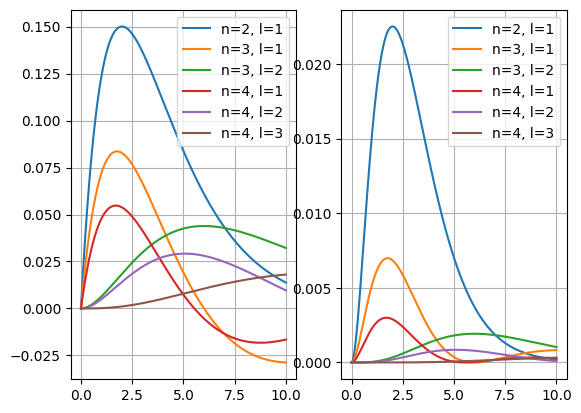

In [3]:
import numpy as np
import sympy as sp
import functions as fn
from IPython.display import display, Math
import scipy.integrate as int
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

hbar = 1
me   = 1
mp = 1836.15
u = (me*mp)/(me+mp)
Z = 1

w,r, phi, theta = sp.symbols('w r phi theta', real=True)


"""
Como principalmente para este taller se conocerán las transiciones energeticas y las series medidas, se necesitan las conversiones de unidades atomicas a unidades energeticas, y tambien unidades de longitud de onda.
"""

hart2cm = 455.633 # en angstroms
hart2ev = 27.2116 # en electronvoltios


# Ahora definamos las funciones radiales y su densidad, es decir, el módulo de estas funciones al cuadrado. Lo haremos de forma similas a como hicimos con los armonicos esfericos


def eferic_armonics_numeric(var1,var2,l,m):
    ef = (sp.sqrt((2*l+1)/(4*sp.pi) * sp.factorial(l-abs(m))/sp.factorial(l+abs(m)) )
          * sp.exp(sp.I * m * var2) * 1/(2**l * sp.factorial(l)) *
          (1-w**2)**(abs(m)/2)* sp.diff((w**2-1)**l,(w,l+abs(m))))
    ef = ef.subs(w,sp.cos(var1))
    return ef

def Radial_part_numeric(var1,n,l):
    p = 2*Z*u/n  * var1
    radial = sp.S(0)
    for k in range(n-l):
        radial +=  (-1)**(k+1) * (sp.factorial(n+l))**2/ (sp.factorial(n-l-1-k)*sp.factorial(2*l+1+k)*sp.factorial(k)) * p**k

    radial *= - sp.sqrt(((2*Z*u/n)**3 * sp.factorial(n-l-1)/(2*n*(sp.factorial(n+l))**3  ))) * sp.exp(-p/2) * p**l

    return radial



def safe_lambdify(vars, expr):
    f = sp.lambdify(vars, expr, "numpy")
    return lambda *args: np.broadcast_to(f(*args), np.broadcast(*args).shape)


rvals= np.linspace(0,10,500)

fig1 ,(ax1,ax2) = plt.subplots(1,2)



for n in range(5):
    for l in range(1,n):
        rad_num =safe_lambdify(r, Radial_part_numeric(r,n,l))
        rad_num = rad_num(rvals)

        display (Math(f"R_{{{n}{l}}}(r) =" + sp.latex(Radial_part_numeric(r,n,l)  )))
        ax1.plot(rvals, rad_num,label=f"n={n}, l={l}")
        ax2.plot(rvals, rad_num**2,label=f"n={n}, l={l}")

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()

In [4]:
# Estudiemos la ortormalidad de estas funciones

num = 4

for Np in range(num):
    for Lp in range(Np):
        # rad_num1 = safe_lambdify(r, Radial_part_numeric(r,np,lp))
        # rad_num1 = rad_num1(rvals)
        for n in range(num):
            for l in range(n):
                # rad_num2 = safe_lambdify(r, Radial_part_numeric(r,n,l))
                # rad_num2 = rad_num2(rvals)

                display (Math(f"<R_{{{Np}{Lp}}}|R_{{{n}{l}}}> =" + sp.latex(round(sp.integrate(Radial_part_numeric(r,Np,Lp)*Radial_part_numeric(r,n,l)*r**2,(r,0,sp.oo)),4)  )))



"""
Vemos que para valores distintos de l y valores iguales a n no se tiene propiedad de ortogonalidad devido a que el valor de l esta directamente ligado con las variables angulares para las cuales si es ortogonal para diferencias en el parametro, pero como R es angularmente simetrico no tiene extrictamente esta particularidad de ortogonalizacion, ademas, los polinomios de laguere son ortogonales para un cierto peso agregado e^{-p}, pero tambien esta incluido p^{l} dentro de ese peso, por lo que resulta en que la ortogonalizacion se rompe para diferente valor de l, para valores iguales, el peso se mantiene estable y se sigue cumpliendo una ortogonalización para los polinomios.
"""


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'\nVemos que para valores distintos de l y valores iguales a n no se tiene propiedad de ortogonalidad devido a que el valor de l esta directamente ligado con las variables angulares para las cuales si es ortogonal para diferencias en el parametro, pero como R es angularmente simetrico no tiene extrictamente esta particularidad de ortogonalizacion, ademas, los polinomios de laguere son ortogonales para un cierto peso agregado e^{-p}, pero tambien esta incluido p^{l} dentro de ese peso, por lo que resulta en que la ortogonalizacion se rompe para diferente valor de l, para valores iguales, el peso se mantiene estable y se sigue cumpliendo una ortogonalización para los polinomios.\n'

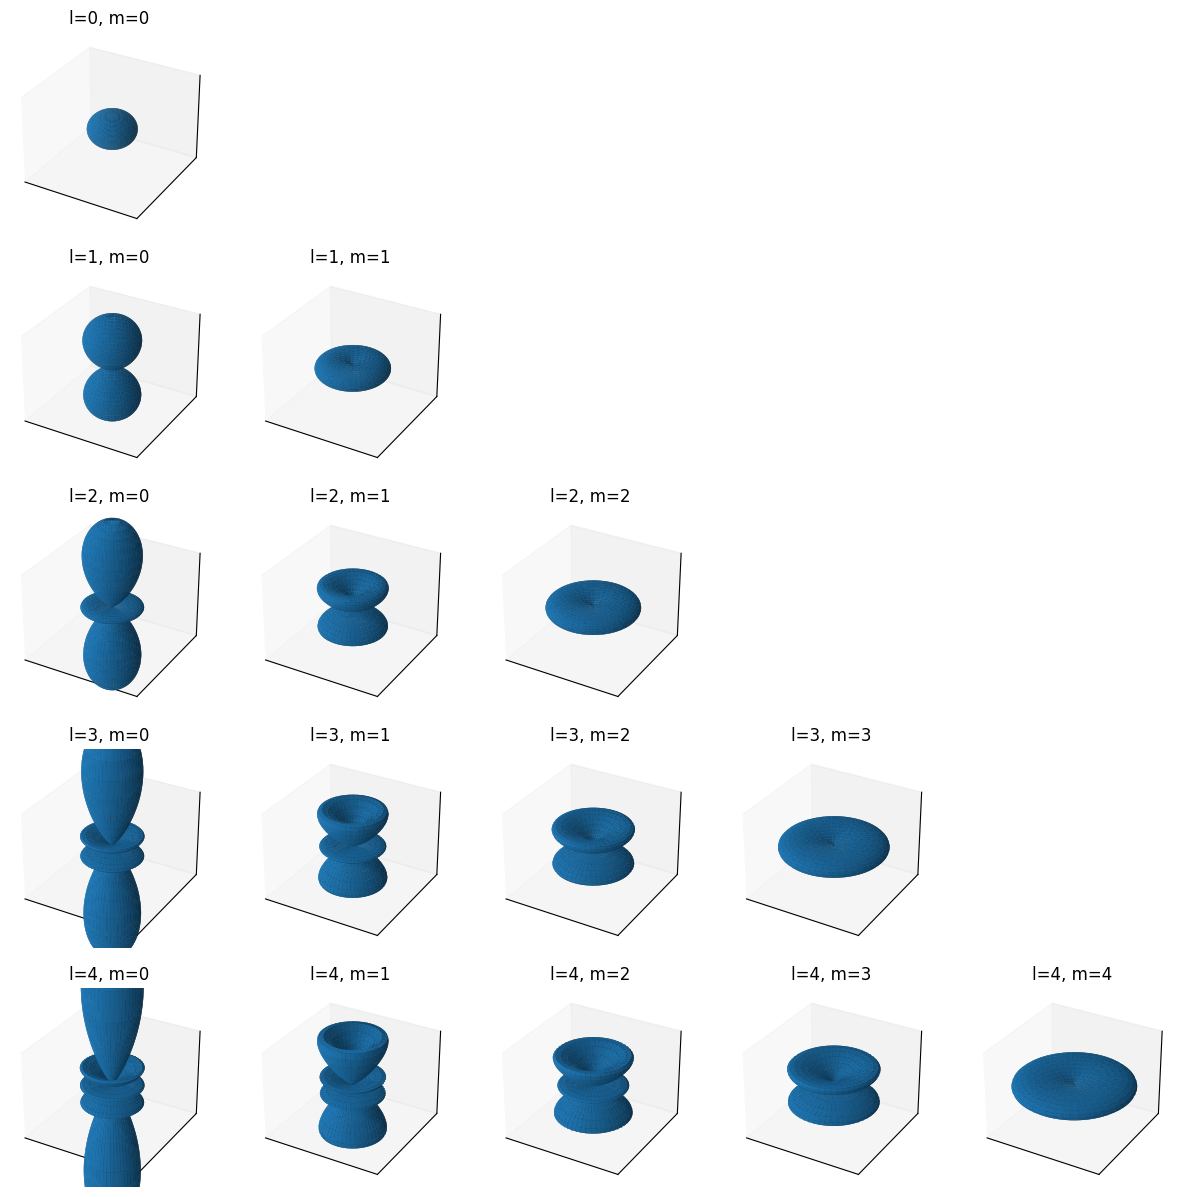

In [5]:
# Ahora le haremos un dibujo a los armonicos esfericos, como son funciones en general imaginarias dibujaremos la densidad de estas

ll = 5
mm = [i for i in range(ll)]  # e.g., [-3, -2, -1, 0, 1, 2, 3]

# Create the figure and axes
fig, axes = plt.subplots(
    nrows=ll,
    ncols=len(mm),
    subplot_kw={'projection': '3d'},  # make all subplots 3D
    figsize=(3*len(mm), 3*ll)         # adjust size dynamically
)

# In case ll=1 or len(mm)=1, axes may not be 2D array
axes = axes.reshape(ll, len(mm))

thetvals,phivals = np.linspace(0,np.pi,500) , np.linspace(0,2*np.pi,500)
Tvals,Pvals = np.meshgrid(thetvals,phivals) # x, y

for l in range(ll):
    for j, m in enumerate(range(l+1)):
        ax = axes[l, j]

        esferic_num =safe_lambdify((theta,phi), eferic_armonics_numeric(theta,phi,l,m))
        rr = np.abs(np.conjugate(esferic_num(Tvals,Pvals))*esferic_num(Tvals,Pvals))


        X = rr*np.sin(Tvals)*np.cos(Pvals)
        Y = rr*np.sin(Tvals)*np.sin(Pvals)
        z = rr*np.cos(Tvals)


        ax.set_title(f"l={l}, m={m}")
        ax.plot_surface( X,Y,z )
        ax.set_xlim(-0.2,0.2)
        ax.set_ylim(-0.2,0.2)
        ax.set_zlim(-0.2,0.2)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])


for i in range(np.shape(axes)[0]):
    for j in range(i+1,np.shape(axes)[1]):
        axes[i, j].set_visible(False)



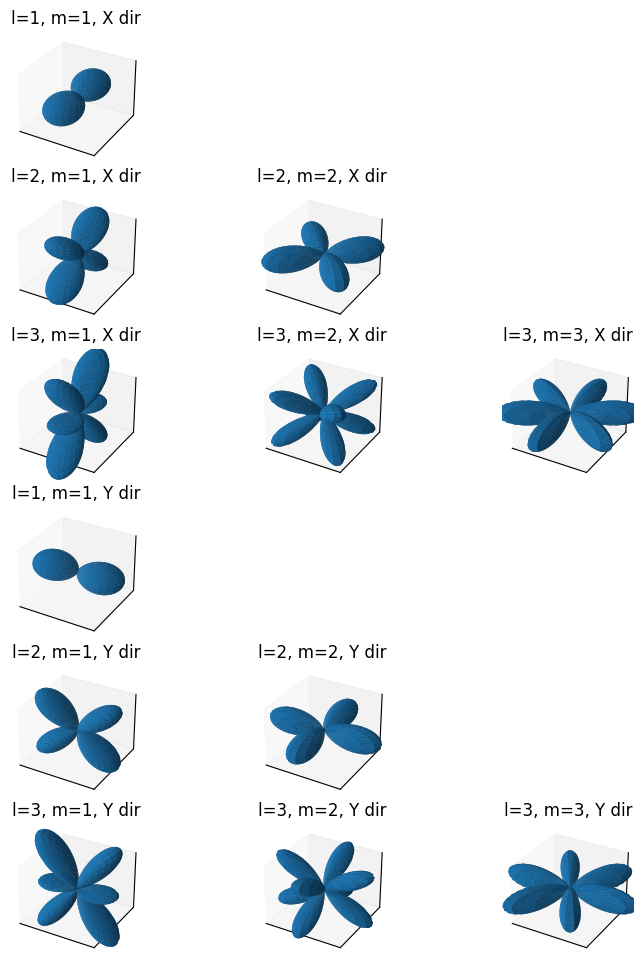

In [6]:
#AHora dibujaremos los armonicos esfericos para las direcciones X y Y

ll = 4
mm = [i for i in range(1,ll)]  # e.g., [-3, -2, -1, 0, 1, 2, 3]

# Create the figure and axes
fig2, axes = plt.subplots(
    nrows=(ll-1)*2,
    ncols=len(mm),
    subplot_kw={'projection': '3d'},  # make all subplots 3D
    figsize=(3*len(mm), 3*ll)         # adjust size dynamically
)

# In case ll=1 or len(mm)=1, axes may not be 2D array
axes = axes.reshape((ll-1)*2, len(mm))

for l in range(1,ll):
    for j, m in enumerate(range(1,l+1)):
        ax1 = axes[l-1, j]
        ax2 = axes[(l-1)+ll-1, j]

        esferic_num1 =safe_lambdify((theta,phi), eferic_armonics_numeric(theta,phi,l,m))
        esferic_num2 =safe_lambdify((theta,phi), eferic_armonics_numeric(theta,phi,l,-m))
        xeferic = -1/math.sqrt(2)*(esferic_num1(Tvals,Pvals) -esferic_num2(Tvals,Pvals))
        yeferic = -1/(1j*math.sqrt(2))*(esferic_num1(Tvals,Pvals) + esferic_num2(Tvals,Pvals))

        rr1 = np.abs(np.conjugate(xeferic)*xeferic)
        rr2 = np.abs(np.conjugate(yeferic)*yeferic)



        X1 = rr1*np.sin(Tvals)*np.cos(Pvals)
        Y1 = rr1*np.sin(Tvals)*np.sin(Pvals)
        Z1 = rr1*np.cos(Tvals)

        X2 = rr2*np.sin(Tvals)*np.cos(Pvals)
        Y2 = rr2*np.sin(Tvals)*np.sin(Pvals)
        Z2 = rr2*np.cos(Tvals)

        ax1.set_title(f"l={l}, m={m}, X dir")
        ax1.plot_surface( X1,Y1,Z1 )
        ax1.set_xlim(-0.2,0.2)
        ax1.set_ylim(-0.2,0.2)
        ax1.set_zlim(-0.2,0.2)
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.set_zticks([])


        ax2.set_title(f"l={l}, m={m}, Y dir")
        ax2.plot_surface( X2,Y2,Z2 )
        ax2.set_xlim(-0.2,0.2)
        ax2.set_ylim(-0.2,0.2)
        ax2.set_zlim(-0.2,0.2)
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2.set_zticks([])



for i in range(np.shape(axes)[0]):
    if i >=3:
        k = i-3
    else:
        k = i
    for j in range(k+1,np.shape(axes)[1]):
        axes[i, j].set_visible(False)


In [10]:
#Por ultimo definimos la funcion de onda total, la cual es la multiplicacin de ls armonicos esfericos y la funcion radial

def Psi(var1,var2,var3,n,l,m):
    psi = Radial_part_numeric(var1,n,l)*eferic_armonics_numeric(var2,var3,l,m)
    return psi

num = 3

for Np in range(num):
    for Lp in range(Np):
        for Mp in range(-Lp,Lp+1):
        # rad_num1 = safe_lambdify(r, Radial_part_numeric(r,np,lp))
        # rad_num1 = rad_num1(rvals)
            for n in range(num):
                for l in range(n):
                    for m in range(-l,l+1):
                    # rad_num2 = safe_lambdify(r, Radial_part_numeric(r,n,l))
                    # rad_num2 = rad_num2(rvals)

                        display (Math(r"<\Psi"+f"_{{{Np}{Lp}{Mp}}}|"+r"\Psi"+f"_{{{n}{l}{m}}}> =" + sp.latex(round(sp.integrate(sp.integrate(sp.integrate(sp.conjugate(Psi(r,theta,phi,Np,Lp,Mp))*Psi(r,theta,phi,n,l,m)*r**2*sp.sin(theta),(r,0,sp.oo)),(theta,0,sp.pi)),(phi,0,2*sp.pi)),2)    )))


<IPython.core.display.Math object>

In [12]:
#Ahora calcularemos las energias a partir de los elementos de matriz del hamiltoniano, esperamos que para cada n se obtenga una diagonal principal independiente a los numeros cuanticos l y m

n = [i for i in range(1,3)]

def L2_op (f):
    L2 = -hbar**2*(sp.diff(f,theta,2)   +  sp.cot(theta)*sp.diff(f,theta)+1/(sp.sin(theta))**2 *sp.diff(f,phi,2))
    return L2

def R_op(f):
    rop = -hbar**2/(2*u)* (sp.diff(f,r,2) + 2/r * sp.diff(f,r))
    return rop

def Hamiltonian(f):
    Ham = R_op(f) + 1/(2*u*r**2)*L2_op(f) -Z/r * f
    return Ham

for j in n:
    H = np.zeros((j**2,j**2))

    for i in range(j**2):
        for l in range(j):
            for m in range(-l,l+1):
                H[i,i] = round(sp.integrate(sp.integrate(sp.integrate(sp.conjugate(Psi(r,theta,phi,j,l,m))*Hamiltonian(Psi(r,theta,phi,j,l,m))*r**2*sp.sin(theta),(r,0,sp.oo)),(theta,0,sp.pi)),(phi,0,2*sp.pi)),3)
    print(H * hart2ev)


# print(round(sp.integrate(sp.integrate(sp.integrate(sp.conjugate(Psi(r,theta,phi,2,1,1))*Hamiltonian(Psi(r,theta,phi,2,1,1))*r**2*sp.sin(theta),(r,0,sp.oo)),(theta,0,sp.pi)),(phi,0,2*sp.pi)),3) * hart2ev)



[[-13.6058]]


In [13]:

def En (n):
    return -u/2 * (Z**2/n**2)

for j in range(1,10):
    display (Math(r"<\Psi"+f"_{{{j}{0}{0}}}|"+r"\hat{H}|\Psi"+f"_{{{j}{0}{0}}}> =" + sp.latex(round(sp.integrate(sp.integrate(sp.integrate(sp.conjugate(Psi(r,theta,phi,j,0,0))*Hamiltonian(Psi(r,theta,phi,j,0,0))*r**2*sp.sin(theta),(r,0,sp.oo)),(theta,0,sp.pi)),(phi,0,2*sp.pi))*hart2ev,2)   )+r"\quad \quad E_{n} = " + sp.latex(round(En(j)*hart2ev,2)) ))


lyman = []
for ly in range(1,10):
    difE = En(ly+1)-En(1)
    lyman.append(1/difE)

lyman = np.round(np.array(lyman)*hart2cm *1e-1,2)
print("Lyman Ser = " + str(lyman))

Balmer = []
for Bal in range(2,11):
    difE = En(Bal+1)-En(2)
    Balmer.append(1/difE)

Balmer = np.round(np.array(Balmer)*hart2cm *1e-1,2)
print("Balmer Ser = " +str(Balmer))

Paschen = []
for Pas in range(3,12):
    difE = En(Pas+1)-En(3)
    Paschen.append(1/difE)

Paschen = np.round(np.array(Paschen)*hart2cm *1e-1,2)
print("Paschen Ser = " +str(Paschen))

Bracket = []
for Bra in range(4,12):
    difE = En(Bra+1)-En(4)
    Bracket.append(1/difE)

Bracket = np.round(np.array(Bracket)*hart2cm *1e-1,2)
print("Bracket Ser = " +str(Bracket))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lyman Ser = [121.57 102.57  97.25  94.98  93.78  93.08  92.62  92.32  92.1 ]
Balmer Ser = [656.47 486.27 434.17 410.29 397.12 389.02 383.65 379.9  377.17]
Paschen Ser = [1875.63 1282.17 1094.11 1005.22  954.86  923.16  901.74  886.53  875.29]
Bracket Ser = [4052.28 2625.88 2166.13 1945.09 1817.91 1736.69 1681.12 1641.17]
